# Generating dataset for logistic regression :

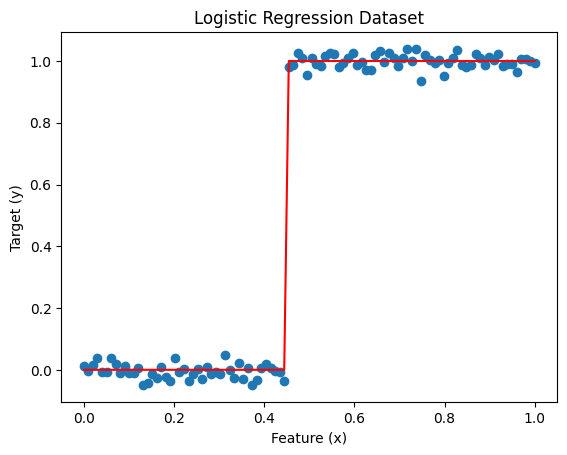

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

np.random.seed(42)  
num_samples = 100  
intercept = -0.90  
slope = 2  
noise_std = 0.025  
y=np.zeros(100)
x = np.linspace(0, 1, num=100)
logits = intercept + slope * x
probs = 1 / (1 + np.exp(-logits))
for i in range (0,100):
    if (probs[i]<0.5):
        y[i]=0
    else :
        y[i]=1
y_real = y + np.random.normal(0, noise_std, num_samples)
data = pd.DataFrame({'x': x, 'y': y_real})
plt.scatter(data['x'], data['y'])
plt.plot(x,y,color="red")
plt.xlabel('Feature (x)')
plt.ylabel('Target (y)')
plt.title('Logistic Regression Dataset')
plt.show()

In [2]:
data.head()

,x,y
0,0.000000,0.012418
1,0.010101,-0.003457
2,0.020202,0.016192
3,0.030303,0.038076
4,0.040404,-0.005854


# Theory :
$for\ logistic\ regression\ we\ know\ likelihood \ L(\theta)=\prod (\ z(X.\beta)^y*(1-z(X.\beta))^{1-y}\ )$<br>
$z(x)=\frac{1}{1+e^{-x}}$<br>
$and\ prior\ is\ Gaussian\ \therefore f(\theta)\sim N(\mu,\sigma)=$
$\frac{1}{\sigma\sqrt{2\pi}}e^{\frac{-(\theta-\mu)^2}{2 \sigma^2}} $<br>
$ as\ posterior\ \propto \ likelihood * prior\ and\ we\ want\ to\ maximize\ posterior\ in\ MAP\ estimation\ so$<br>
$ we\ are\ going\ to\ use\ negative\ log (posterior)\ = \ -  log(likelihood)-\log(prior)$<br>
$we\ minimise\ it\ to\ find\ the\ maximium\ of\ log\ posterior$<br>

# Optimization :

In [3]:
from scipy.optimize import minimize


def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def negative_log_likelihood(theta, X, y):
    
    log_likelihood = y * np.log(sigmoid(np.dot(X , theta))) + (1 - y) * np.log(1 - sigmoid(np.dot(X , theta)))
    return -np.sum(log_likelihood)

def map_estimation(X, y, mu, sigma,initital_theta):
    
   
    def negative_log_posterior(theta):
        # as rest of the terms don't depend on theta so we don't consider them in minimizing theta
        prior_log_prob = 0.5 * np.dot((np.dot((theta - mu).T , np.linalg.inv(sigma))), (theta - mu))
        return negative_log_likelihood(theta, X, y) - prior_log_prob
    
    
    result = minimize(negative_log_posterior, initial_theta)
    theta_map = result.x
    
    return theta_map


# Driver code :
X=data.iloc[:,:1].values 
y=data.iloc[:,1:].values

# Add intercept term to the input data
X = np.c_[np.ones((X.shape[0], 1)),X]

# prior parameters
mu = np.zeros(X.shape[1])  
sigma = np.array([[0.02,0],[0,0.02]])

initial_theta = np.array([-0.80, 2.10])

# MAP estimation
theta_map = map_estimation(X, y, mu, sigma, initial_theta)

print("MAP estimate of parameters:")
print(theta_map)

MAP estimate of parameters:
[ 0.21086559 -0.03283639]


I don't know why but the estimates are not correct.